In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.gaussian_process import GaussianProcessRegressor
import pandas as pd

In [2]:
X = np.load('initial_data/function_4/initial_inputs.npy')
Y = np.load('initial_data/function_4/initial_outputs.npy')

30

In [4]:
my_dict = {
    'X1': X[:,0],
    'X2': X[:,1],
    'X3': X[:,2],
    'X4': X[:,3],
    'Y' : Y
}

df = pd.DataFrame(my_dict)
df

,X1,X2,X3,X4,Y
0,0.896981,0.725628,0.175404,0.701694,-22.108288
1,0.889356,0.499588,0.539269,0.508783,-14.601397
2,0.250946,0.033693,0.145380,0.494932,-11.699932
3,0.346962,0.006250,0.760564,0.613024,-16.053765
4,0.124871,0.129770,0.384400,0.287076,-10.069633
5,0.801303,0.500231,0.706645,0.195103,-15.487083
6,0.247708,0.060445,0.042186,0.441324,-12.681685
7,0.746702,0.757092,0.369353,0.206566,-16.026400
8,0.400665,0.072574,0.886768,0.243842,-17.049235
9,0.626071,0.586751,0.438806,0.778858,-12.741766


In [12]:
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

# to optimize the acquisition function, we will simply use gridsearch over a space of 6,250,000 gridpoints
x1 = np.linspace(0, 1, 50)
x2 = np.linspace(0, 1, 50)
x3 = np.linspace(0, 1, 50)
x4 = np.linspace(0, 1, 50)

X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        for k in range(len(x3)):
            for l in range(len(x4)):
                X_grid.append([x1[i], x2[j], x3[k], x4[l]])

X_grid = np.array(X_grid)
mean, std = gpr.predict(X_grid, return_std = True)
ucb = mean + 1.96 * std

idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
print(str(round(next_query[0],6)) + '-' + str(round(next_query[1],6)) + '-' + str(round(next_query[2],6)) + '-' + str(round(next_query[3],6)))

0.428571-0.387755-0.367347-0.408163


<IPython.core.display.Javascript object>


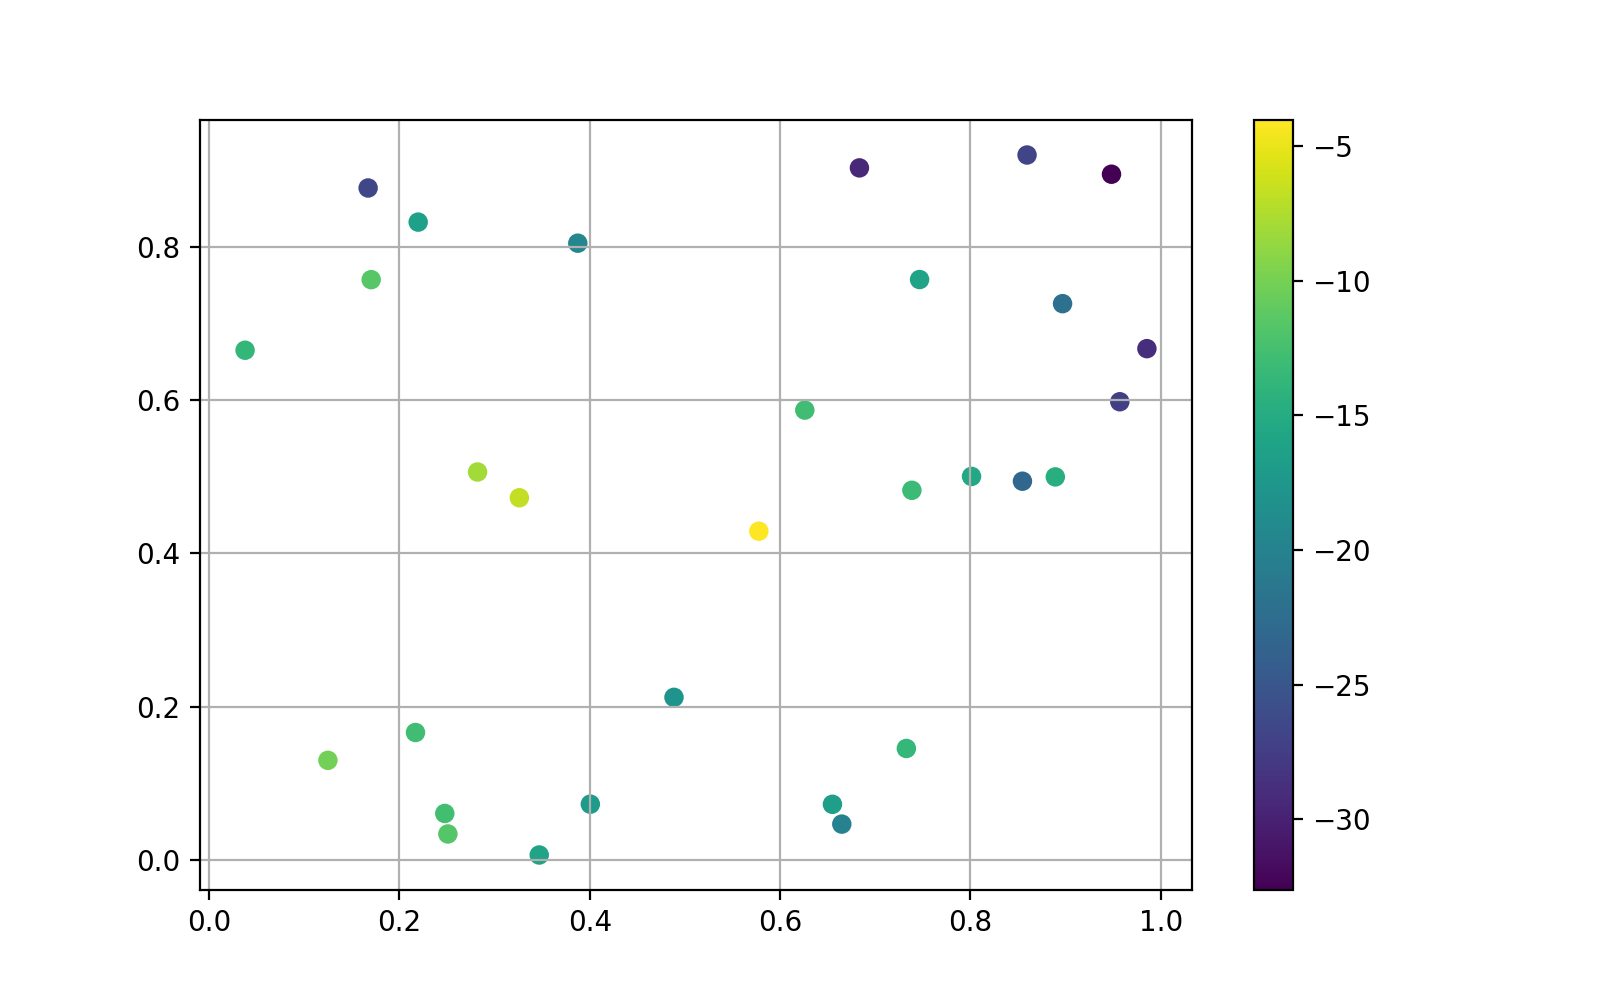

In [6]:
# Now let's plot some heatmaps to see how any pair of inputs affects the output

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.grid()
plt.colorbar()

<IPython.core.display.Javascript object>


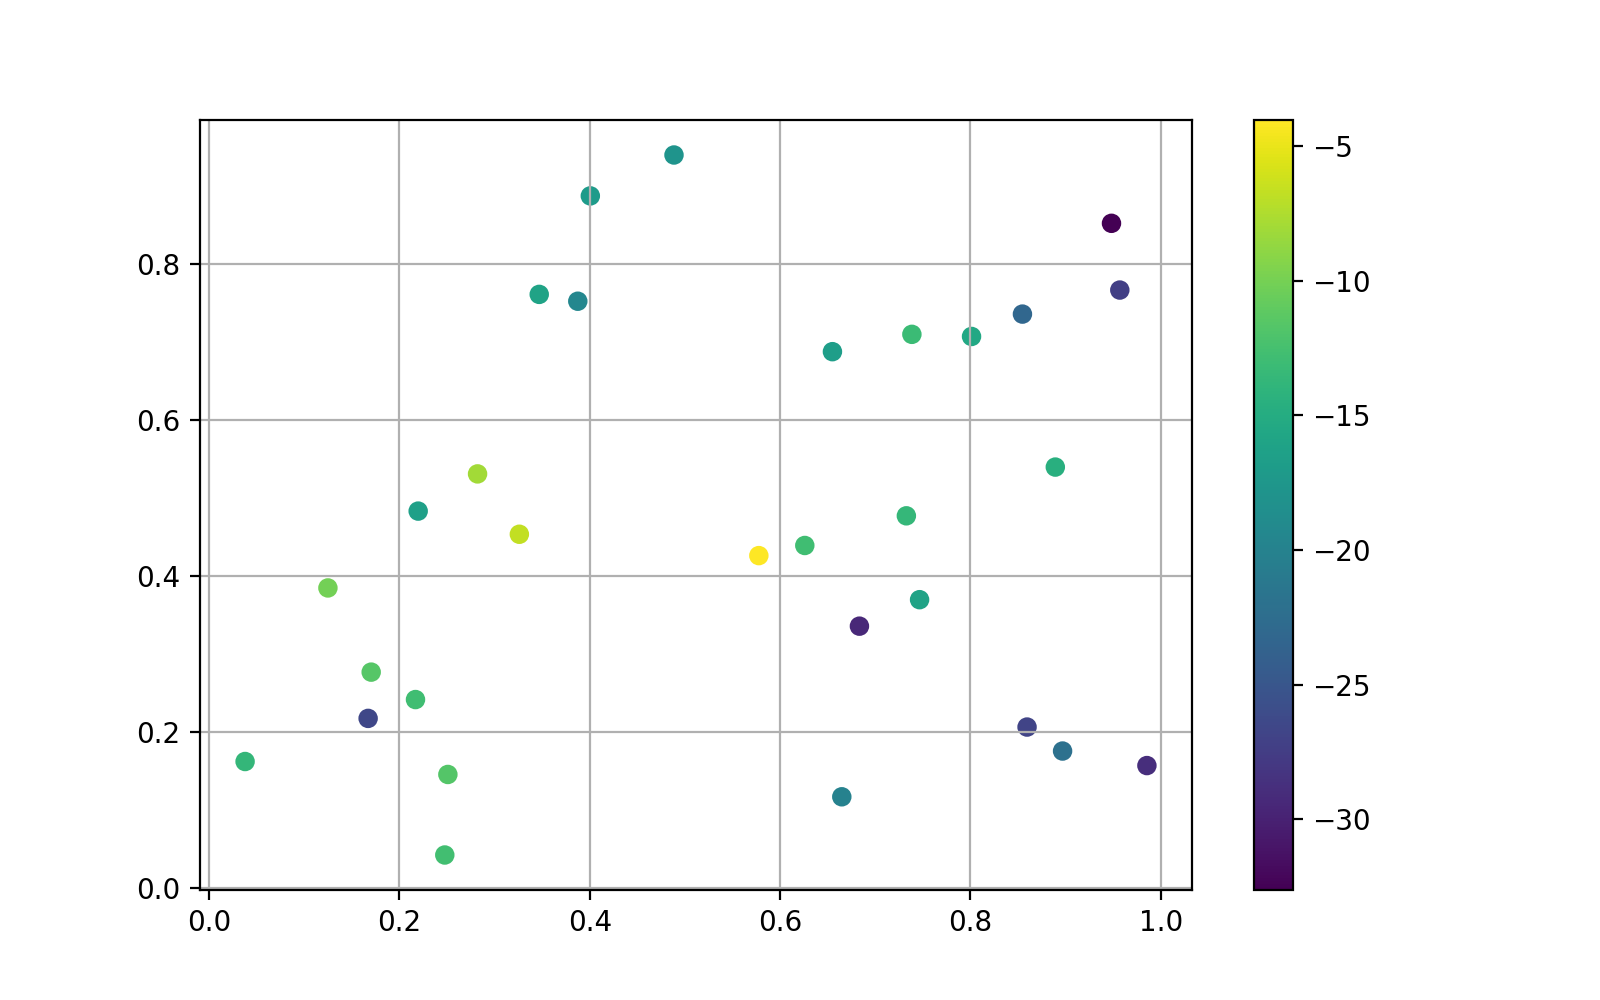

In [7]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:, 0], X[:, 2], c = Y)
plt.grid()
plt.colorbar()

<IPython.core.display.Javascript object>


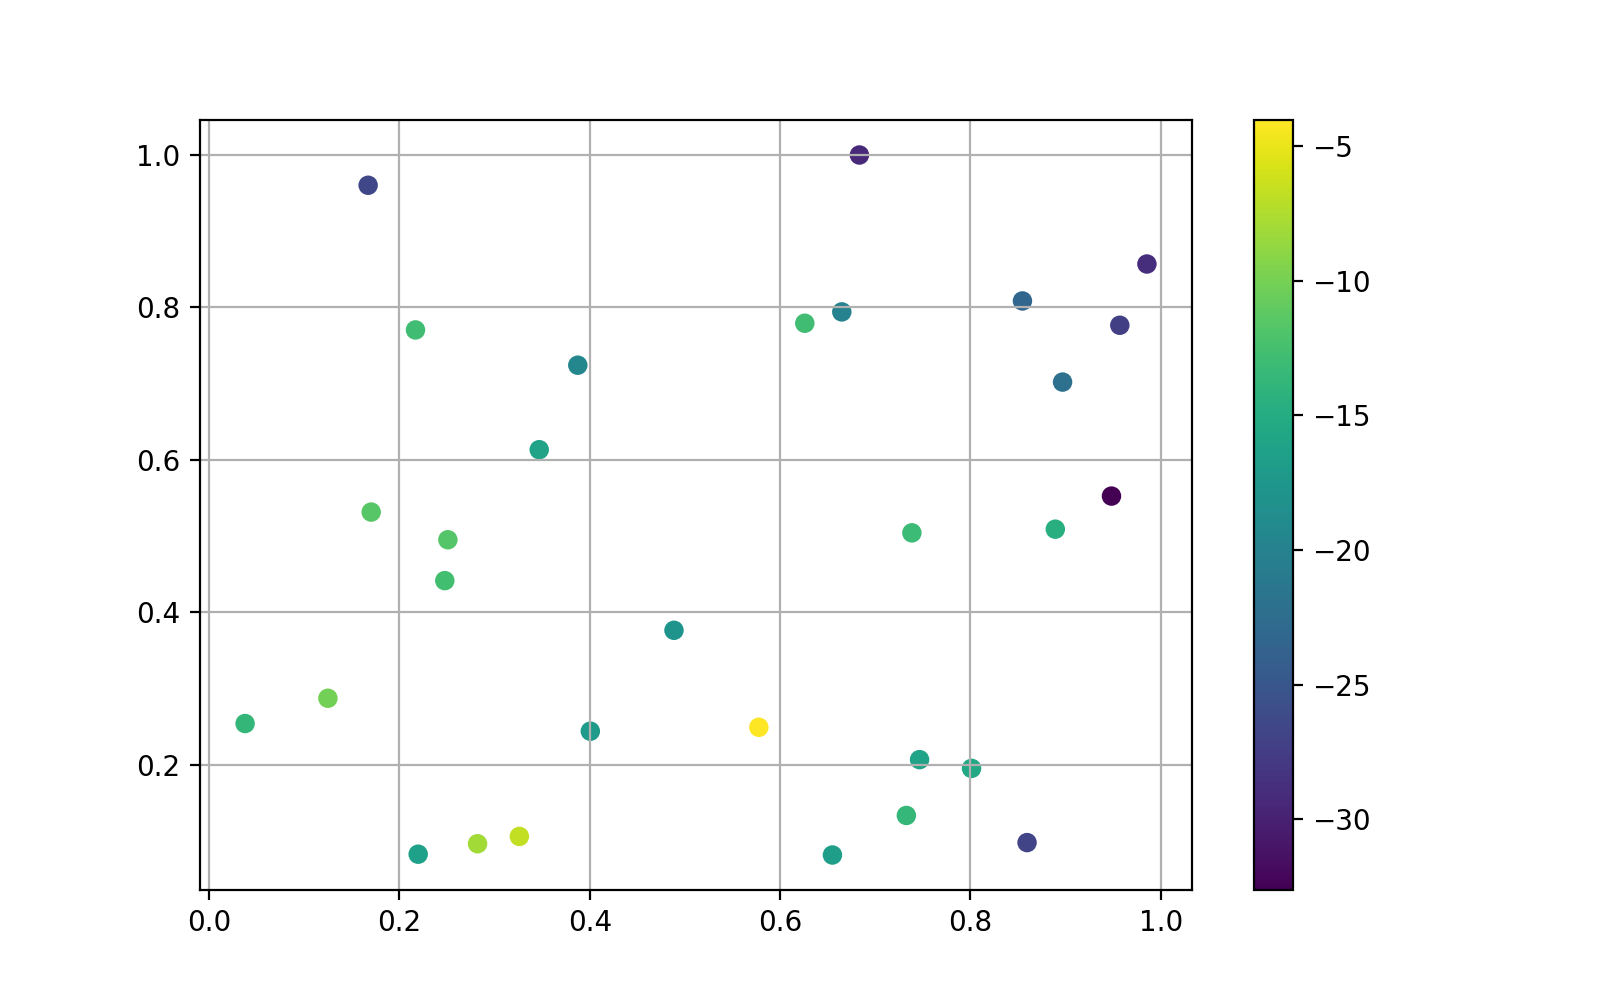

In [8]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:, 0], X[:, 3], c = Y)
plt.grid()
plt.colorbar()

<IPython.core.display.Javascript object>


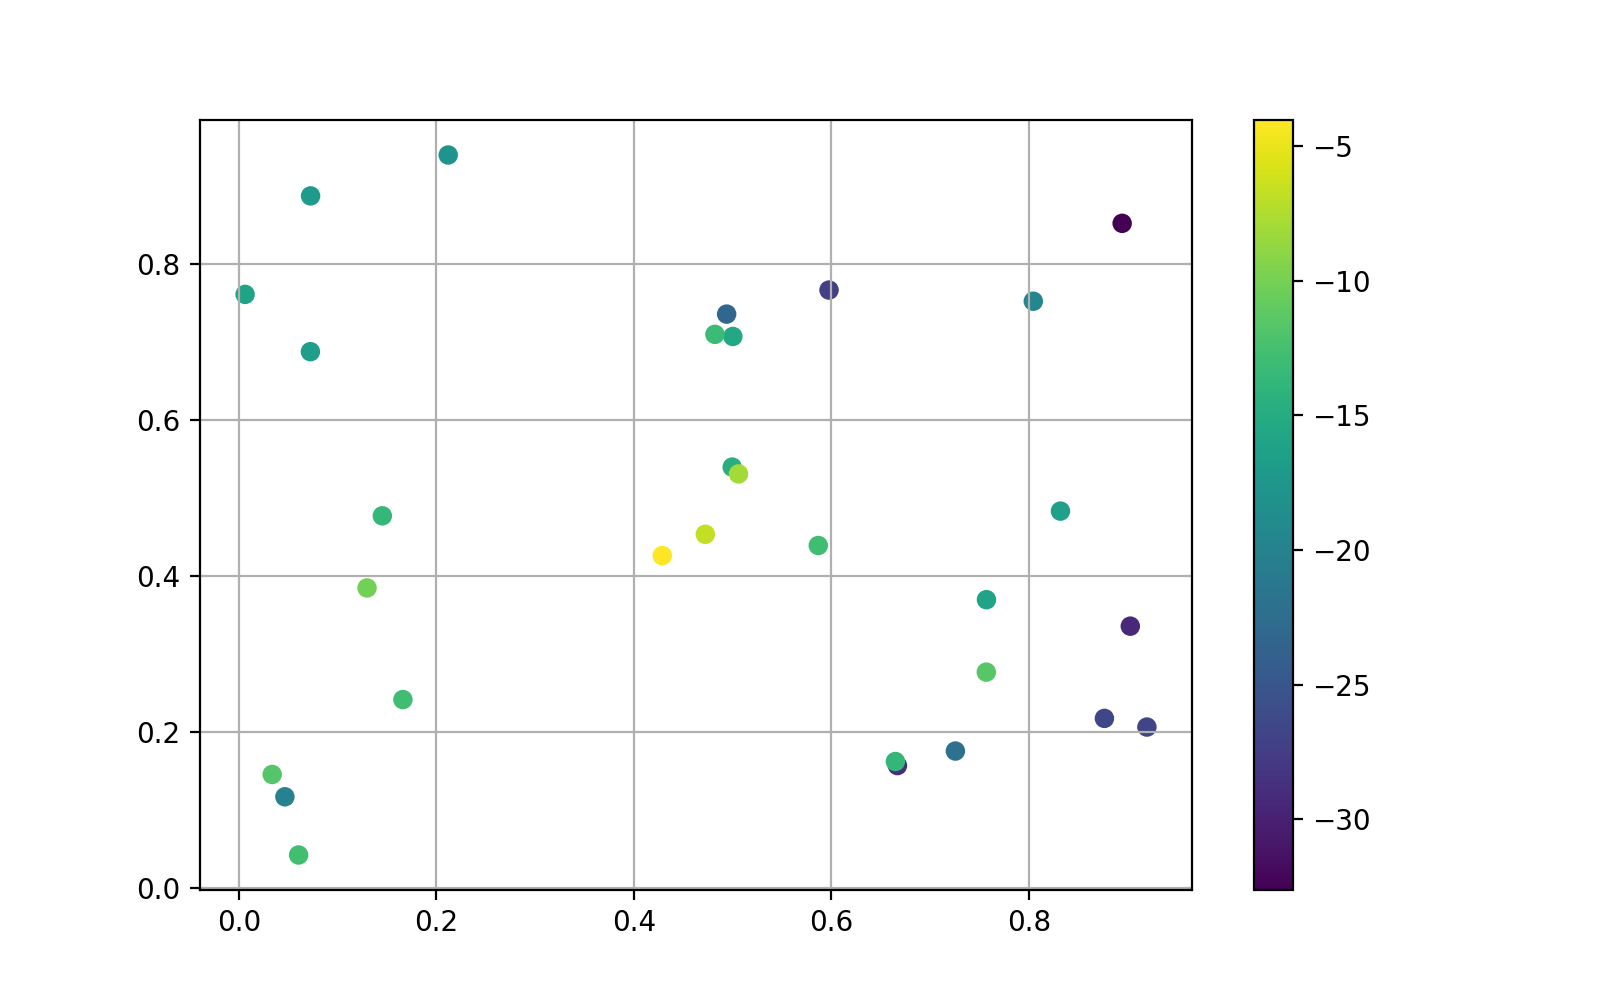

In [9]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:, 1], X[:, 2], c = Y)
plt.grid()
plt.colorbar()

<IPython.core.display.Javascript object>


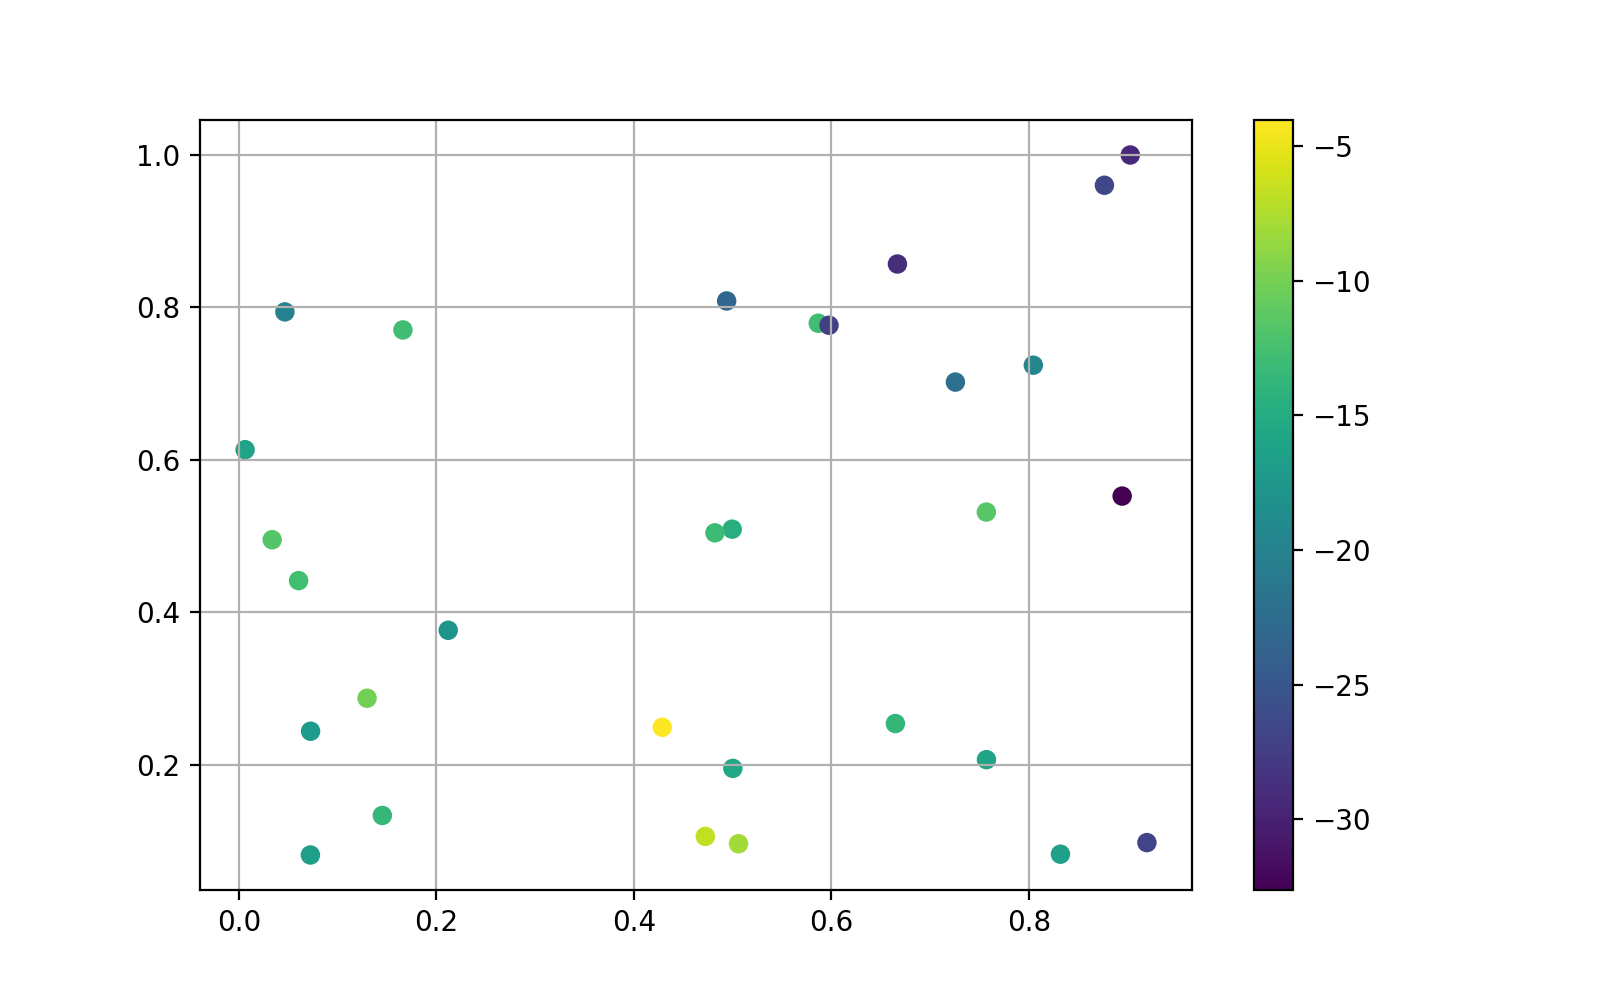

In [10]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:, 1], X[:, 3], c = Y)
plt.grid()
plt.colorbar()

<IPython.core.display.Javascript object>


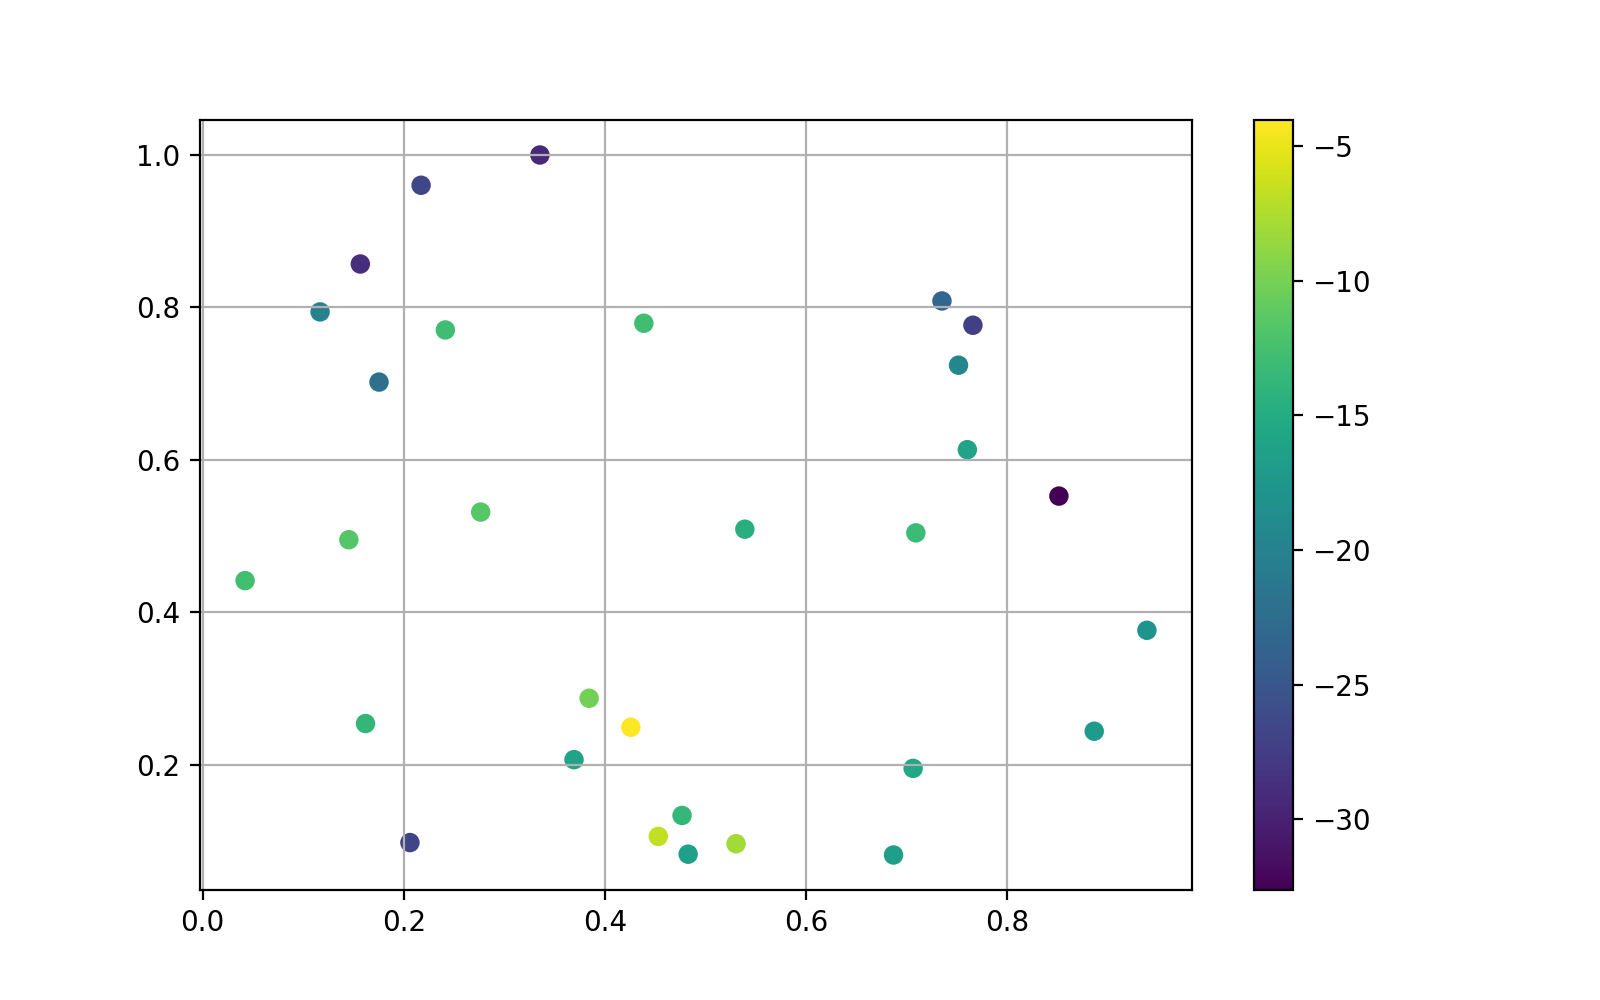

In [11]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:, 2], X[:, 3], c = Y)
plt.grid()
plt.colorbar()